In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## California House Prediction Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [5]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)

In [10]:
df['Target']=california_df.target

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.shape

(20640, 9)

In [13]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [14]:
df.shape

(5160, 9)

In [15]:
# Independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12240,2.5898,35.0,4.636879,1.073759,2328.0,3.302128,33.75,-116.96
11621,4.6681,19.0,6.050802,1.109626,2318.0,3.098930,33.83,-118.04
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98
2645,2.1354,29.0,5.096085,1.067616,1314.0,2.338078,40.57,-124.14
14291,3.6058,52.0,4.983240,1.037244,1181.0,2.199255,32.73,-117.13


In [17]:
y.head()

12240    0.763
11621    3.207
11416    3.905
2645     0.751
14291    2.131
Name: Target, dtype: float64

In [18]:
### Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [20]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
y_pred=regressor.predict(X_test)

In [22]:
y_pred

array([1.886, 1.281, 1.311, ..., 1.207, 1.532, 1.242])

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [24]:
score

0.5263246039766836

In [25]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [27]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [28]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [29]:
regressor=DecisionTreeRegressor(criterion='poisson',max_depth=7,max_features='log2',splitter='best')

In [30]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='log2')

[Text(0.5661407766990292, 0.9375, 'x[6] <= 38.455\npoisson = 0.303\nsamples = 3457\nvalue = 2.067'),
 Text(0.2982402912621359, 0.8125, 'x[0] <= 4.557\npoisson = 0.298\nsamples = 3085\nvalue = 2.172'),
 Text(0.14987864077669902, 0.6875, 'x[5] <= 2.414\npoisson = 0.216\nsamples = 2150\nvalue = 1.752'),
 Text(0.07766990291262135, 0.5625, 'x[7] <= -117.235\npoisson = 0.269\nsamples = 551\nvalue = 2.357'),
 Text(0.038834951456310676, 0.4375, 'x[6] <= 37.935\npoisson = 0.267\nsamples = 477\nvalue = 2.488'),
 Text(0.019417475728155338, 0.3125, 'x[6] <= 34.525\npoisson = 0.254\nsamples = 433\nvalue = 2.594'),
 Text(0.009708737864077669, 0.1875, 'x[7] <= -118.335\npoisson = 0.211\nsamples = 224\nvalue = 2.799'),
 Text(0.0048543689320388345, 0.0625, 'poisson = 0.139\nsamples = 100\nvalue = 3.278'),
 Text(0.014563106796116505, 0.0625, 'poisson = 0.21\nsamples = 124\nvalue = 2.412'),
 Text(0.02912621359223301, 0.1875, 'x[7] <= -121.885\npoisson = 0.282\nsamples = 209\nvalue = 2.374'),
 Text(0.0242

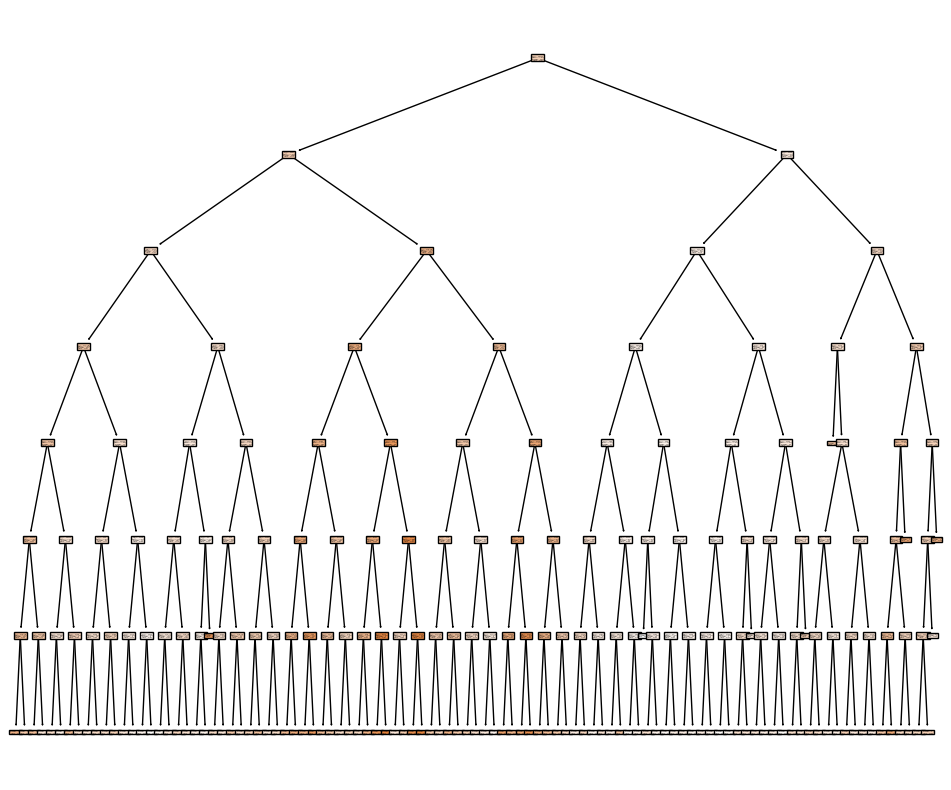

In [31]:

from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)

In [32]:
y_pred=regressorcv.predict(X_test)

In [34]:
y_pred

array([1.83194444, 1.42548182, 1.66757219, ..., 1.87271903, 1.97704348,
       1.92076923])

In [35]:
r2_score(y_pred,y_test)

0.4426555618837196